**Titanic Survival Prediction Task (Data Science Intern-CodSoft)**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# import dataset
df = pd.read_csv('/content/tested.csv')

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
df.shape

(418, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [63]:
# Feature Engineering and Preprocessing
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)


In [64]:
# Fill missing values in 'Age' with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [65]:

# Drop rows with missing values in 'Fare'
#df.dropna(subset=['Fare'], inplace=True)

In [66]:
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [67]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1


In [68]:
df.shape

(418, 9)

In [69]:
# Split the dataset into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [70]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [71]:
# Standardize features (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
#Import ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [73]:
# Initialize and train machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [74]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classificationreport = classification_report(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion, 'Classification Report': classificationreport}

In [75]:
# Display results
for name, result in results.items():
    print(f'Model: {name}')
    print(f'Accuracy: {result["Accuracy"]}')
    print(f'Confusion Matrix:\n{result["Confusion Matrix"]}\n')
    print(f'Classification Report:\n{result["Classification Report"]}\n')


Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Model: Gradient Boosting
Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   

In [76]:
# Count the number of survivors (assuming 1 represents survived)
survived_count = df['Survived'].value_counts()[1]

# Count the number of non-survivors (assuming 0 represents did not survive)
not_survived_count = df['Survived'].value_counts()[0]

print(f"Number of people who survived: {survived_count}")
print(f"Number of people who did not survive: {not_survived_count}")

Number of people who survived: 152
Number of people who did not survive: 266


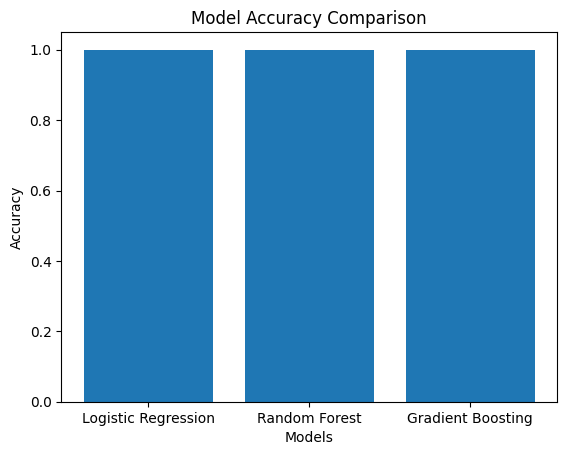

In [77]:
# Plot accuracy comparison
model_names = list(results.keys())
accuracy_values = [result['Accuracy'] for result in results.values()]

plt.bar(model_names, accuracy_values)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()